In [1]:
%pylab inline
import numpy as np
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Draw_all(pos01,T01,pos02,T02):
    
    # vectors frame 2D
    vecY1 = T01.dot(array([0, 0.5,0 ,0]))
    vecX1 = T01.dot(array([0.5, 0,0 ,0]))
    
    vecY2 = T02.dot(array([0, 0.5,0 ,0]))
    vecX2 = T02.dot(array([0.5, 0,0 ,0]))

    
    circle2 = plt.Circle((1, 1), 2, color='b', fill=False)

    f = plt.figure()
    ax = plt.gca()
    
    ax.cla() # clear things for fresh plot
    ax.arrow(0, 0, 0, 0.5,width = 0.05,color ='red')
    ax.arrow(0, 0, 0.5, 0,width = 0.05,color ='green')
    
    # change default range so that new circles will work
    ax.set_xlim((-1.5, 3.5))
    ax.set_ylim((-1.5, 3.5))
    ax.set_aspect('equal', 'box')  
    plt.ylabel(r'$y(m)$')
    plt.xlabel(r'$x(m)$')
    
    ax.arrow(pos01[0], pos01[1], vecY1[0], vecY1[1],width = 0.05,color ='red')
    ax.arrow(pos01[0], pos01[1], vecX1[0], vecX1[1],width = 0.05,color ='green')
    
    ax.arrow(pos02[0], pos02[1], vecY2[0], vecY2[1],width = 0.05,color ='red')
    ax.arrow(pos02[0], pos02[1], vecX2[0], vecX2[1],width = 0.05,color ='green')

    ax.add_artist(circle2)
#     f.savefig('exp_e1.pdf', bbox_inches="tight")
    pause(0.1)
    ax.clear()
    plt.clf()
    return

# Transformation matrix with rotation arround z-axis local frame
def Trans(Theta, pT):
    T_0_2 = array([[cos(Theta), -sin(Theta), 0, pT[0]],
                   [sin(Theta), cos(Theta), 0, pT[1]],
                   [0, 0, 1, pT[2]],
                   [0, 0, 0, pT[3]]])
    return T_0_2

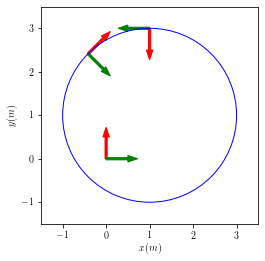

<Figure size 432x288 with 0 Axes>

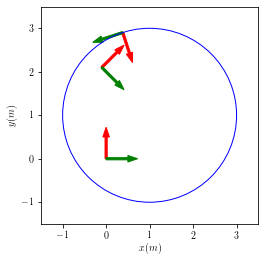

<Figure size 432x288 with 0 Axes>

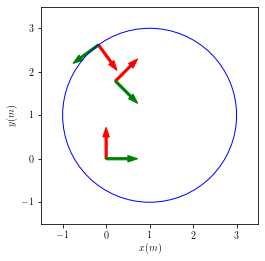

<Figure size 432x288 with 0 Axes>

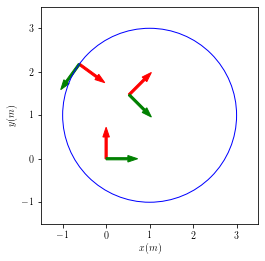

<Figure size 432x288 with 0 Axes>

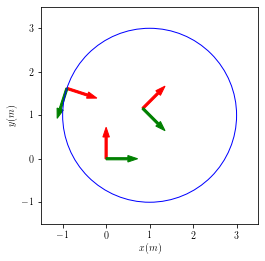

<Figure size 432x288 with 0 Axes>

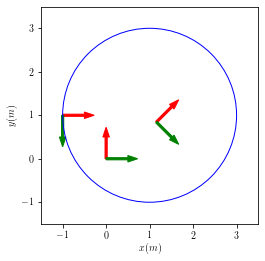

<Figure size 432x288 with 0 Axes>

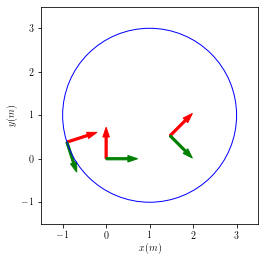

<Figure size 432x288 with 0 Axes>

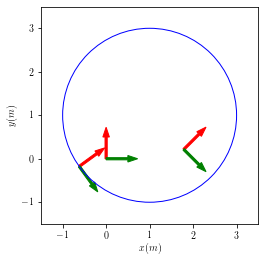

<Figure size 432x288 with 0 Axes>

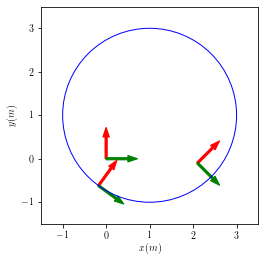

<Figure size 432x288 with 0 Axes>

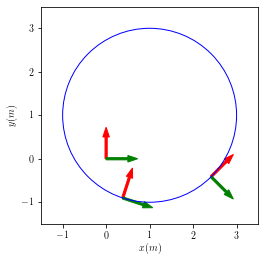

<Figure size 432x288 with 0 Axes>

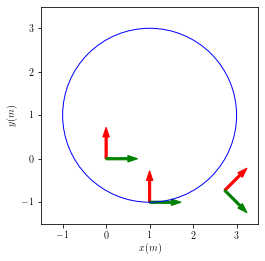

<Figure size 432x288 with 0 Axes>

In [13]:

L = 1
H = 2
R = 2



#initial conditions 
#world frame
T0C = Trans(0,array([L,L,H,1]))


# simulation time 
tend = pi
Δt = pi/10
time = linspace(0.,tend, int(tend/Δt + 1))  # Time interval

for t in time:
    
    # Car 1
    
    theta = pi/2 + t/R
    TC1 = Trans(theta+pi/2,array([R*cos(theta),R*sin(theta),0,1]))
    T01 = T0C.dot(TC1)
    pos01 = T01.dot(array([0,0,0,1]))      
    
    # Car 2
    TC2 = Trans(-45*pi/180,array([-sqrt(2) + t,sqrt(2)- t,0,1]))
    T02 = T0C.dot(TC2)
    
    pos02 = T02.dot(array([0,0,0,1]))
#     print(pos02)
    
    Draw_all(pos01,T01,pos02,T02)
